In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [3]:
import deepmatcher as dm
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi
import pandas as pd
import torch

In [4]:
attributes =['title','manufacturer','price']

## Hybrid

### Dataset creation

In [5]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/amazongoogle_hybrid.pth')
hybrid_model = hybrid_model.cuda()

In [6]:
negatives = return_layer_input(hybrid_model,hybrid_model.classifier,'../../datasets/Structured/Amazon-Google/'
                                                                         ,'negatives')


Reading and processing data from "../../datasets/Structured/Amazon-Google/negatives.csv"
0% [############################# ] 100% | ETA: 00:00:00

In [7]:
testneg = return_layer_input(hybrid_model,hybrid_model.classifier,'../../datasets/Structured/Amazon-Google/'
                                                                         ,'test_negatives')


Reading and processing data from "../../datasets/Structured/Amazon-Google/test_negatives.csv"
0% [############################# ] 100% | ETA: 00:00:00

In [8]:
positives = return_layer_input(hybrid_model,hybrid_model.classifier,
                               '../../datasets/Structured/Amazon-Google/','positives')


Reading and processing data from "../../datasets/Structured/Amazon-Google/positives.csv"
0% [############################# ] 100% | ETA: 00:00:00

In [9]:
testpos = return_layer_input(hybrid_model,hybrid_model.classifier,'../../datasets/Structured/Amazon-Google/',
                                                                  'test_positives')


Reading and processing data from "../../datasets/Structured/Amazon-Google/test_positives.csv"
0% [############################# ] 100% | ETA: 00:00:00

In [10]:
classifier_len = len(list(positives.values())[0])
attribute_len = int(classifier_len/len(attributes))

### Negatives analysis

In [15]:
negatives_ri_hybrid,neg_ri_norms_df = computeRi(hybrid_model.classifier,
                                                    attributes,testneg,0)

100%|██████████| 2059/2059 [01:39<00:00, 20.80it/s]


In [16]:
torch.save(negatives_ri_hybrid,'experiment_results/testneg_ri_hybrid.pt')

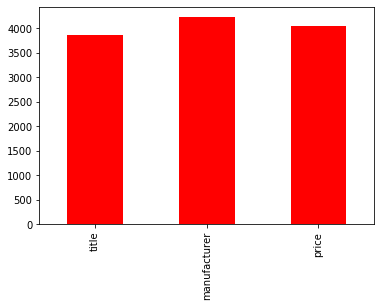

In [18]:
neg_ri_norms_df.sum().plot.bar(color='red')

## Test positives analysis

In [19]:
positives_ri_hybrid,pos_ri_norms_hybrid = computeRi(hybrid_model.classifier,
                                                    attributes,testpos,1)
torch.save(positives_ri_hybrid,'experiment_results/testpos_ri_hybrid.pt')

100%|██████████| 234/234 [00:19<00:00, 11.99it/s]


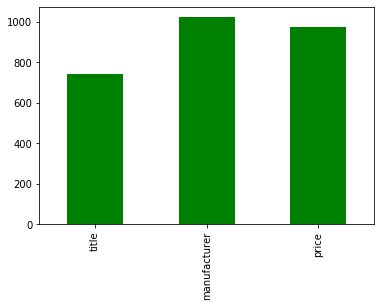

In [20]:
pos_ri_norms_hybrid.sum().plot.bar(color='green')

## Compute nearest neighbours

In [21]:
from utils.distance_measures import nearestNeighborsOnAttribute

In [22]:
testpos_ri = torch.load('experiment_results/testpos_ri_hybrid.pt')
testneg_ri = torch.load('experiment_results/testneg_ri_hybrid.pt')

In [23]:
positives_nn_hybrid = nearestNeighborsOnAttribute(testpos,testpos_ri,negatives,attributes,attribute_len,
                                                  min_similarity=0)

100%|██████████| 234/234 [00:01<00:00, 208.49it/s]


In [25]:
negatives_nn_hybrid = nearestNeighborsOnAttribute(testneg,testneg_ri,
                                                              positives,attributes,attribute_len,min_similarity=0)

100%|██████████| 2059/2059 [00:03<00:00, 666.77it/s]


In [27]:
positives_nn_hybrid.to_csv('experiment_results/testpos_nn_hybrid.csv',index=False)
negatives_nn_hybrid.to_csv('experiment_results/testneg_nn_hybrid.csv',index=False)